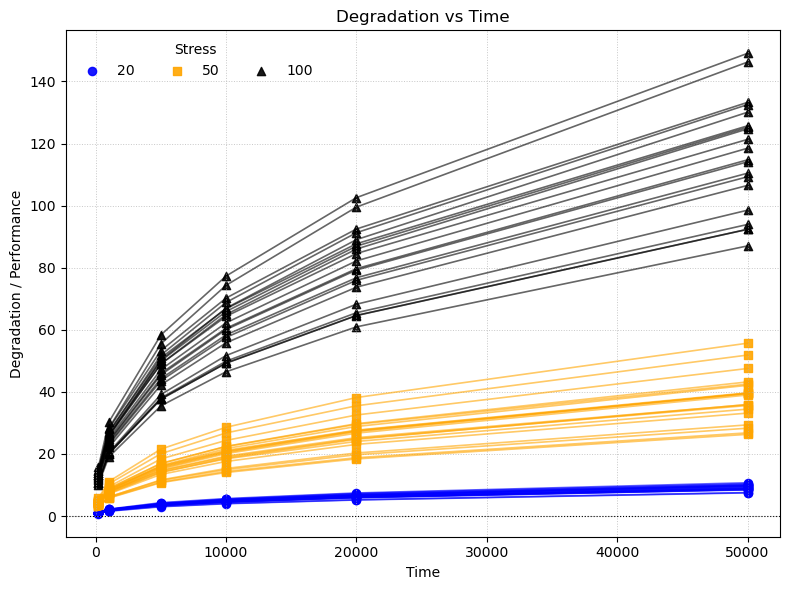

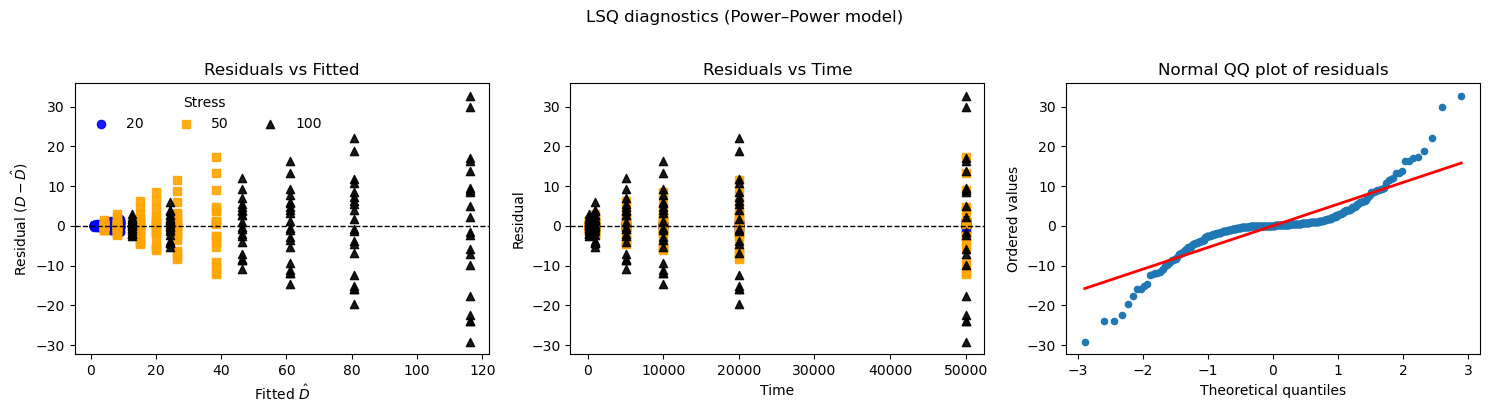

 67%|████████████████████████████████████████████████████▍                         | 1345/2000 [00:15<00:07, 90.69it/s]

In [ ]:
# ADT P_P w/ generated data
from adt_utils import ADTDataGenerator, plot_degradation_by_stress
import numpy as np

# 2) Power–Power wear example
theta = (1.0e-3, 1.6, 0.4)   # b, n_S, m_t (made-up but reasonable)
sigma_meas = 0.04
unit_cv_pos = 0.02

gen_pp = ADTDataGenerator(
    model="power_power",
    theta=theta,
    sigma_meas=sigma_meas,
    noise="additive",
    stress_use=5,
    Df=40.0,
    unit_cv_pos=unit_cv_pos,
    seed=6,
)

weights = np.array([20.0, 50.0, 100.0])
times = np.array([200, 1000, 5000, 10000, 20000, 50000])

data_pp = gen_pp.generate(
    stress_levels=weights,
    times=times,
    n_units_per_stress=20,
    truncate_at_failure=False,
)

# plot_degradation_by_stress(
#     t=data_pp["Time"],
#     D=data_pp["Degradation"],
#     stress=data_pp["Stress"],
#     unit=data_pp["Unit"],
#     title="Synthetic wear data (Power–Power model)",
#     stress_label="Applied weight (g)",
#     legend_title="Stress",
#     scale="linear",
#     show_unit_lines=True,
# )

from ADT_fitters import Fit_ADT_Power_Power
fit_pp = Fit_ADT_Power_Power(
    degradation=data_pp["Degradation"],
    stress=data_pp["Stress"],
    time=data_pp["Time"],
    unit = data_pp["Unit"],
    stress_use=5.0,
    Df=40.0,
    CI=0.95,
    method="Bayesian",
    # noise="additive",
    noise="multiplicative",
    show_data_plot=True,
    show_LSQ_diagnostics=True,
    show_noise_bounds=True,
    show_use_TTF_dist=True,
    print_results=True)

In [ ]:
# ADT P_E w/ generated data
from adt_utils import ADTDataGenerator, plot_degradation_by_stress
import numpy as np

# Power–Exponential model:
# D(t, S) = b * exp(a/S) * t^n
theta = (2e-3, 5, 5)   # b, a, n   (example values)
sigma_meas = 0.001
unit_cv_pos = 0.001

gen_pe = ADTDataGenerator(
    model="power_exponential",
    theta=theta,
    sigma_meas=sigma_meas,
    noise="additive",      # or "multiplicative"
    stress_use=5.0,
    Df=20.0,
    unit_cv_pos=unit_cv_pos,
    seed=6,
)

weights = np.array([10.0, 50.0, 250.0])      # stress levels S
times = np.array([200, 500, 1000, 5000, 10000, 20000])

data_pe = gen_pe.generate(stress_levels=weights, times=times, n_units_per_stress=20, truncate_at_failure=False)

from ADT_fitters import Fit_ADT_Exponential_Arrhenius
fit_pe = Fit_ADT_Exponential_Arrhenius(
    degradation=data_pe["Degradation"],
    stress=data_pe["Stress"],
    time=data_pe["Time"],
    unit = data_pe["Unit"],
    stress_use=5.0,
    Df=20.0,
    CI=0.95,
    method="MLE",
    # noise="additive",
    noise="multiplicative",
    show_data_plot=True,
    show_LSQ_diagnostics=False,
    show_noise_bounds=True,
    show_use_TTF_dist=True,
    print_results=True)

In [ ]:
# ADT SQRT_A w/ generated data
from adt_utils import plot_degradation_by_stress, ADTDataGenerator
from ADT_fitters import Fit_ADT_sqrt_Arrhenius
import numpy as np

# Population parameters roughly similar to your LED example
theta = (0.5, 0.01, 0.30)    # g0, g1, Ea[eV]
sigma_meas = 0.010              # relatively small measurement noise
unit_cv_pos = 0.05
gen = ADTDataGenerator(
    model="sqrt_arrhenius",
    theta=theta,
    sigma_meas=sigma_meas,
    noise="multiplicative",
    stress_use=45.0,            # °C
    Df=5.0,
    unit_cv_pos=unit_cv_pos,           # unit-to-unit spread of parameters
    unit_cv_signed=0.15,
    seed=123,
)

# 3 stress levels above use temperature
temps = gen.default_stress_grid(45.0, [20.0, 40.0, 70.0])   # e.g. 65, 85, 115 °C

# Reasonable time grid
times = np.array([250, 500, 1000, 2000, 4000, 7000, 10000])

data_pe = gen.generate(
    stress_levels=temps,
    times=times,
    n_units_per_stress=8,
    truncate_at_failure=True,
)

fit_pe = Fit_ADT_sqrt_Arrhenius(
    degradation=data_pe["Degradation"],
    stress=data_pe["Stress"],
    time=data_pe["Time"],
    unit = data_pe["Unit"],
    stress_use=45.0,
    Df=5.0,
    CI=0.95,
    method="MLE",
    # noise="additive",
    noise="multiplicative",
    show_data_plot=True,
    show_LSQ_diagnostics=True,
    show_noise_bounds=True,
    show_use_TTF_dist=True,
    print_results=True)

In [ ]:
# ADT E_A w/ generated data

from adt_utils import ADTDataGenerator, plot_degradation_by_stress
import numpy as np

theta = (2e-3, 1e-3, 0.6)  # b, a, Ea[eV]
sigma_meas = 0.01
unit_cv_pos= 0.1

gen_expA = ADTDataGenerator(
    model="exponential_arrhenius",
    theta=theta,
    sigma_meas=sigma_meas,
    noise="multiplicative",
    stress_use=50.0,   # °C
    Df=40.0,
    unit_cv_pos=unit_cv_pos,
    seed=7,
)

temps = np.array([30.0, 50.0, 70.0])     # °C
times = np.array([100, 500, 1000, 2000])

data_expA = gen_expA.generate(
    stress_levels=temps,
    times=times,
    n_units_per_stress=20,
    truncate_at_failure=False,
)

# plot= plot_degradation_by_stress(
#     t=data_expA["Time"],
#     D=data_expA["Degradation"],
#     stress=data_expA["Stress"],
#     unit= data_expA["Unit"],
#     title="Degradation vs Time by Stress",
#     stress_label="Stress level",
#     legend_title="Stress",
#     scale="ylog",           # "linear", "loglog"
#     base_colors=None,
#     base_markers=None,
#     show_unit_lines=True)

from ADT_fitters import Fit_ADT_Exponential_Arrhenius
fit_pe = Fit_ADT_Exponential_Arrhenius(
    degradation=data_expA["Degradation"],
    stress=data_expA["Stress"],
    time=data_expA["Time"],
    unit = data_expA["Unit"],
    stress_use=5.0,
    Df=20.0,
    CI=0.95,
    method="MLE",
    # noise="additive",
    noise="multiplicative",
    show_data_plot=True,
    show_LSQ_diagnostics=False,
    show_noise_bounds=True,
    show_use_TTF_dist=True,
    print_results=True)